In [58]:
import six

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from anchor.visualize import MODALITY_TO_COLOR, MODALITY_ORDER, MODALITY_PALETTE
modality_order = MODALITY_ORDER

sns.set(style='ticks', context='paper', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

%matplotlib inline

%load_ext autoreload
%autoreload 2

folder = 'pdfs'#'/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages'

import flotilla

flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects'
study = flotilla.embark('singlecell_pnm_figure4_voyages', flotilla_dir=flotilla_dir)

/home/obotvinnik/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/obotvinnik/workspace-git/flotilla/flotilla/__init__.py:65: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  load_species_data=load_species_data)


2016-10-26 09:15:09	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure4_voyages/datapackage.json
2016-10-26 09:15:09	Parsing datapackage to create a Study object
https://s3-us-west-2.amazonaws.com/flotilla-projects/ercc/ERCC_Controls.txt has not been downloaded before.
2016-10-26 09:15:41 	Initializing Study
2016-10-26 09:15:41 	Initializing Predictor configuration manager for Study
2016-10-26 09:15:41	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2016-10-26 09:15:41	Added ExtraTreesClassifier to default predictors
2016-10-26 09:15:41	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2016-10-26 09:15:41	Added ExtraTreesRegressor to default predictors
2016-10-26 09:15:41	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2016-10-26 09:15:41	Added GradientBoostingClassifier to defa

Error loading species hg19 data: HTTP Error 404: Not Found

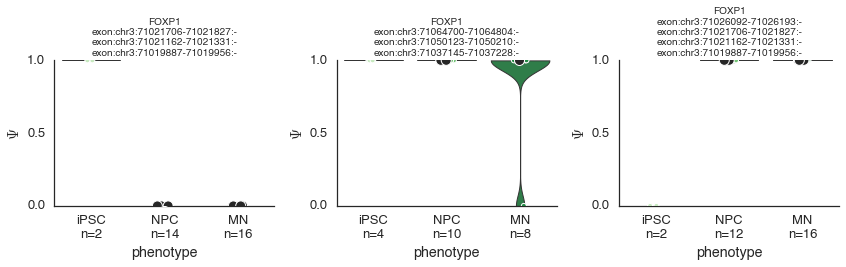

In [2]:
study.plot_event('FOXP1')

In [3]:
foxp1_event = study.splicing.maybe_renamed_to_feature_id('FOXP1')[1]
foxp1_event

'exon:chr3:71064700-71064804:-@exon:chr3:71050123-71050210:-@exon:chr3:71037145-71037228:-'

In [5]:
study.splicing.data[foxp1_event].dropna()

sample_id
CVN_02     1
CVN_07     1
CVN_17     1
CVN_19     1
CVN_23     1
CVN_24     1
CVN_31     1
CVN_35     1
M1_01      0
M1_08      1
M1_12      1
M2_05      1
M2nd_01    1
M3_01      1
M4_13      1
M6_04      1
M6_05      1
N1_05      1
N1_10      1
N2_11      1
N3_07      1
N4_05      1
P2_10      1
P3_01      1
P7_05      1
P7_09      1
Name: exon:chr3:71064700-71064804:-@exon:chr3:71050123-71050210:-@exon:chr3:71037145-71037228:-, dtype: float64

In [6]:
study.supplemental.voyages.head()

,event_id,$\Delta x$,$\Delta y$,magnitude,group1,group2,direction,transition,group1_modality,group2_modality
0,exon:chr10:101165513-101165617:-@exon:chr10:10...,0.000000,0.034483,0.034483,iPSC,NPC,$\nwarrow$,iPSC-NPC,included,included
1,exon:chr10:101165513-101165617:-@exon:chr10:10...,0.000000,0.034483,0.034483,iPSC,MN,$\nwarrow$,iPSC-MN,included,included
2,exon:chr10:101165513-101165617:-@exon:chr10:10...,0.000000,0.000000,0.000000,NPC,MN,NaN,NPC-MN,included,included
3,exon:chr10:101480744-101480825:-@exon:chr10:10...,0.157895,-0.028862,0.160511,iPSC,NPC,$\searrow$,iPSC-NPC,included,bimodal
4,exon:chr10:101480744-101480825:-@exon:chr10:10...,0.058824,0.070209,0.091594,iPSC,MN,$\nearrow$,iPSC-MN,included,bimodal


In [8]:
voyages = study.supplemental.voyages.query('transition == "iPSC-MN"')
print(voyages.shape)
voyages.head()

(4946, 10)


,event_id,$\Delta x$,$\Delta y$,magnitude,group1,group2,direction,transition,group1_modality,group2_modality
1,exon:chr10:101165513-101165617:-@exon:chr10:10...,0.000000,0.034483,0.034483,iPSC,MN,$\nwarrow$,iPSC-MN,included,included
4,exon:chr10:101480744-101480825:-@exon:chr10:10...,0.058824,0.070209,0.091594,iPSC,MN,$\nearrow$,iPSC-MN,included,bimodal
11,exon:chr10:102114184-102114389:+@exon:chr10:10...,0.000000,0.035088,0.035088,iPSC,MN,$\nwarrow$,iPSC-MN,included,included
14,exon:chr10:102286732-102286831:-@exon:chr10:10...,0.000000,0.000000,0.000000,iPSC,MN,NaN,iPSC-MN,included,included
17,exon:chr10:102747070-102747240:-@exon:chr10:10...,0.126068,-0.126068,0.178288,iPSC,MN,$\searrow$,iPSC-MN,included,bimodal


In [18]:
voyages_change_modality = voyages.query('group1_modality != group2_modality')
print(voyages_change_modality.shape)
voyages_change_modality.head()

(1067, 10)


,event_id,$\Delta x$,$\Delta y$,magnitude,group1,group2,direction,transition,group1_modality,group2_modality
4,exon:chr10:101480744-101480825:-@exon:chr10:10...,0.058824,0.070209,0.091594,iPSC,MN,$\nearrow$,iPSC-MN,included,bimodal
17,exon:chr10:102747070-102747240:-@exon:chr10:10...,0.126068,-0.126068,0.178288,iPSC,MN,$\searrow$,iPSC-MN,included,bimodal
23,exon:chr10:103360960-103361093:+@exon:chr10:10...,-0.022973,0.050000,0.055025,iPSC,MN,$\nwarrow$,iPSC-MN,excluded,bimodal
29,exon:chr10:103360960-103361093:+@exon:chr10:10...,0.055556,-0.055556,0.078567,iPSC,MN,$\searrow$,iPSC-MN,included,bimodal
35,exon:chr10:103563492-103563776:-@exon:chr10:10...,0.045455,-0.045455,0.064282,iPSC,MN,$\searrow$,iPSC-MN,included,bimodal


In [10]:
sns.set(context='paper', style='white')

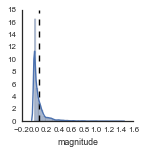

In [12]:
fig, ax = plt.subplots(figsize=(2, 2))
sns.distplot(voyages['magnitude'])

ymin, ymax = ax.get_ylim()
ax.vlines(voyages['magnitude'].mean(), ymin, ymax, linestyle='--')
sns.despine()

In [13]:
voyages.magnitude.describe()

count    4946.000000
mean        0.083681
std         0.150073
min         0.000000
25%         0.000000
50%         0.034483
75%         0.094281
max         1.414214
Name: magnitude, dtype: float64

In [15]:
magnitude_mean = voyages.magnitude.mean()
magnitude_mean

0.083681336535075063

In [16]:
voyages_large = voyages.query('magnitude > @magnitude_mean')
print(voyages_large.shape)
voyages_large.head()

(1405, 10)


,event_id,$\Delta x$,$\Delta y$,magnitude,group1,group2,direction,transition,group1_modality,group2_modality
4,exon:chr10:101480744-101480825:-@exon:chr10:10...,0.058824,0.070209,0.091594,iPSC,MN,$\nearrow$,iPSC-MN,included,bimodal
17,exon:chr10:102747070-102747240:-@exon:chr10:10...,0.126068,-0.126068,0.178288,iPSC,MN,$\searrow$,iPSC-MN,included,bimodal
62,exon:chr10:104262357-104262466:-@exon:chr10:10...,-0.068966,0.068966,0.097532,iPSC,MN,$\nwarrow$,iPSC-MN,bimodal,included
86,exon:chr10:105156166-105156223:-@exon:chr10:10...,0.390128,0.019608,0.390621,iPSC,MN,$\nearrow$,iPSC-MN,excluded,excluded
102,exon:chr10:1094804-1095110:-@exon:chr10:108993...,0.267857,-0.125000,0.295588,iPSC,MN,$\searrow$,iPSC-MN,bimodal,bimodal


In [17]:
voyages_large.groupby('direction').size()

direction
$\nearrow$    142
$\nwarrow$    510
$\searrow$    671
$\swarrow$     82
dtype: int64

In [21]:
voyages_large_modalities = voyages_large.groupby(['group1_modality', 'group2_modality']).size().reset_index()
voyages_large_modalities = voyages_large_modalities.rename(columns={0: 'Number of events'})
voyages_large_modalities.head()

,group1_modality,group2_modality,Number of events
0,bimodal,bimodal,279
1,bimodal,excluded,94
2,bimodal,included,160
3,excluded,bimodal,158
4,excluded,excluded,114


In [24]:
(voyages_large_modalities[['group1_modality', 'group2_modality']] == 'bimodal').any(axis=1)

0      True
1      True
2      True
3      True
4     False
5     False
6     False
7      True
8     False
9     False
10     True
11    False
dtype: bool

In [31]:
col = 'To/From Bimodal'
bimodal1 = voyages_large_modalities['group1_modality'] == "bimodal"
bimodal2 = voyages_large_modalities['group2_modality'] == "bimodal"

voyages_large_modalities[col] = 'Other > Other'
voyages_large_modalities.loc[bimodal1, col] = 'Bimodal > Other'
voyages_large_modalities.loc[bimodal2, col] = 'Other > Bimodal'
voyages_large_modalities.loc[bimodal1 & bimodal2, col] = 'Bimodal > Bimodal'
voyages_large_modalities


,group1_modality,group2_modality,Number of events,To/From Bimodal
0,bimodal,bimodal,279,Bimodal > Bimodal
1,bimodal,excluded,94,Bimodal > Other
2,bimodal,included,160,Bimodal > Other
3,excluded,bimodal,158,Other > Bimodal
4,excluded,excluded,114,Other > Other
5,excluded,included,7,Other > Other
6,excluded,uncategorized,2,Other > Other
7,included,bimodal,381,Other > Bimodal
8,included,included,176,Other > Other
9,middle,included,1,Other > Other


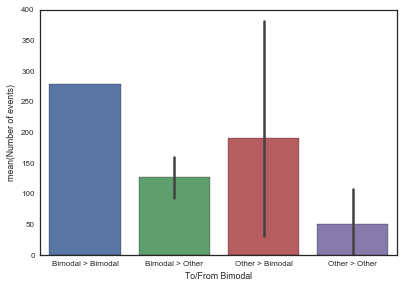

In [32]:
sns.barplot(x='To/From Bimodal', y='Number of events', data=voyages_large_modalities)

In [30]:
bimodal1 = voyages_large['group1_modality'] == 'bimodal'
bimodal2 = voyages_large['group2_modality'] == 'bimodal'

voyages_large[col] = 'Other > Other'
voyages_large.loc[bimodal1, col] = 'Bimodal > Other'
voyages_large.loc[bimodal2, col] = 'Other > Bimodal'
voyages_large.loc[bimodal1 & bimodal2, col] = 'Bimodal > Bimodal'
voyages_large.head()

/home/obotvinnik/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,event_id,$\Delta x$,$\Delta y$,magnitude,group1,group2,direction,transition,group1_modality,group2_modality,To/From Bimodal
4,exon:chr10:101480744-101480825:-@exon:chr10:10...,0.058824,0.070209,0.091594,iPSC,MN,$\nearrow$,iPSC-MN,included,bimodal,Other > Bimodal
17,exon:chr10:102747070-102747240:-@exon:chr10:10...,0.126068,-0.126068,0.178288,iPSC,MN,$\searrow$,iPSC-MN,included,bimodal,Other > Bimodal
62,exon:chr10:104262357-104262466:-@exon:chr10:10...,-0.068966,0.068966,0.097532,iPSC,MN,$\nwarrow$,iPSC-MN,bimodal,included,Bimodal > Other
86,exon:chr10:105156166-105156223:-@exon:chr10:10...,0.390128,0.019608,0.390621,iPSC,MN,$\nearrow$,iPSC-MN,excluded,excluded,Other > Other
102,exon:chr10:1094804-1095110:-@exon:chr10:108993...,0.267857,-0.125000,0.295588,iPSC,MN,$\searrow$,iPSC-MN,bimodal,bimodal,Bimodal > Bimodal


In [34]:
voyages_large.groupby(['direction', 'To/From Bimodal']).size()

direction   To/From Bimodal  
$\nearrow$  Bimodal > Bimodal     35
            Other > Bimodal       87
            Other > Other         20
$\nwarrow$  Bimodal > Bimodal     97
            Bimodal > Other      156
            Other > Bimodal      135
            Other > Other        122
$\searrow$  Bimodal > Bimodal    140
            Bimodal > Other       92
            Other > Bimodal      341
            Other > Other         98
$\swarrow$  Bimodal > Bimodal      7
            Bimodal > Other        6
            Other > Bimodal        8
            Other > Other         61
dtype: int64

In [35]:
from bonvoyage.visualize import voyageplot

In [36]:
voyageplot?

In [37]:
from bonvoyage.visualize import arrowplot

In [38]:
arrowplot?

In [39]:
! grep arrowplot *.ipynb

5.06_large_voyages_domain_changes.ipynb:    "from bonvoyage.visualize import arrowplot"
5.06_large_voyages_domain_changes.ipynb:    "arrowplot?"


In [41]:
voyages_large['event_name'] = voyages_large['event_id']

/home/obotvinnik/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [46]:
waypoints = study.supplemental.waypoints.set_index('Unnamed: 1', append=True)
waypoints.index = waypoints.index.swaplevel(0, 1)
waypoints.head()

,,0,1
Unnamed: 1,phenotype,,
exon:chr10:101165513-101165617:-@exon:chr10:101163481-101163631:-@exon:chr10:101163226-101163391:-,MN,0.000000,1.000000
exon:chr10:101480744-101480825:-@exon:chr10:101478103-101478257:-@exon:chr10:101476105-101476218:-,MN,0.058824,0.941176
exon:chr10:102114184-102114389:+@exon:chr10:102116289-102116521:+@exon:chr10:102120491-102124591:+,MN,0.000000,1.000000
exon:chr10:102286732-102286831:-@exon:chr10:102286156-102286311:-@exon:chr10:102283500-102283686:-,MN,0.000000,1.000000
exon:chr10:102747070-102747240:-@exon:chr10:102746847-102746953:-@exon:chr10:102746506-102746732:-,MN,0.153846,0.846154


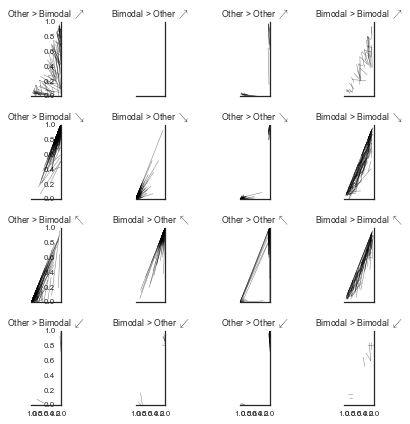

In [54]:
grid = sns.FacetGrid(col='To/From Bimodal', row='direction', data=voyages_large, size=1.5)
grid.map_dataframe(arrowplot, waypoints=waypoints, color='k', linewidth=.5)
grid.set(xlim=(0, 1), ylim=(0, 1))
grid.set_titles('{col_name} {row_name}')

## Domain changes

In [55]:
study.splicing.feature_data.columns

Index([u'Unnamed: 0', u'criteria', u'criteria_additional', u'criteria_full',
       u'ensembl_id', u'exon1', u'exon1_length', u'exon2', u'exon2_length',
       u'exon3', u'exon3_length', u'exon4', u'exon4_length', u'gencode_id',
       u'gene_name', u'intron_length', u'junction12', u'junction13',
       u'junction23', u'junction24', u'junction34', u'strand',
       u'transcript_id', u'exon2_divisible_by_3', u'one_ensembl_id',
       u'splice_type'],
      dtype='object')

In [56]:
folder = '/projects/ps-yeolab/obotvinnik/singlecell_pnms'
csv_folder = '{}/csvs_for_paper/'.format(folder)


splicing_feature_folder = '{}/splicing_feature_data'.format(csv_folder)
alternative_feature_folder = '{}/alternative'.format(splicing_feature_folder)
constitutive_feature_folder = '{}/constitutive'.format(splicing_feature_folder)

In [61]:
isoform_domain_effects = pd.read_csv('{}/isoform_domain_effects.csv'.format(alternative_feature_folder), index_col=0, 
                                     squeeze=True)
print(isoform_domain_effects.shape)
isoform_domain_effects.head()

(22152,)


event_name
exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100189330-100189399:-    No annotated reading frame --> Protein +/- domain
exon:chr10:101165513-101165617:-@exon:chr10:101163481-101163631:-@exon:chr10:101163226-101163391:-    No annotated reading frame --> Protein +/- domain
exon:chr10:101421203-101421385:+@exon:chr10:101439018-101439223:+@exon:chr10:101439482-101439632:+    No annotated reading frame --> Protein +/- domain
exon:chr10:101480744-101480825:-@exon:chr10:101478103-101478257:-@exon:chr10:101476105-101476218:-    No annotated reading frame --> Protein +/- domain
exon:chr10:101507014-101507147:+@exon:chr10:101510126-101510153:+@exon:chr10:101514286-101514391:+                                          Same status
Name: isoform_domain_effects, dtype: object

In [63]:
from anchor import MODALITY_ORDER

col = 'isoform_domain_effects'

order = MODALITY_ORDER[:3]
isoform_domain_effects_order = [
    'No annotated reading frame --> Protein +/- domain',
    'No domain --> Domain',
    'Domain switch',       
    'Same status',
    'Domain --> No domain',
    'Protein +/- domain --> No annotated reading frame', 
]

hue_order = isoform_domain_effects_order

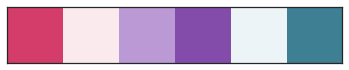

In [64]:
n = 2
s=75
l=50
red = 0
blue = 220
purple = 290
palette = sns.light_palette((red, s, l), n_colors=n, input='husl', reverse=True) + \
            sns.light_palette('indigo', n_colors=4)[1:3] + \
            sns.light_palette((blue, s, l), n_colors=n, input='husl')
sns.palplot(palette)

### Large voyages

In [68]:
voyages_large_domains = voyages_large.join(isoform_domain_effects, on='event_id')
print(voyages_large_domains.shape)
voyages_large_domains.head()

(1405, 13)


,event_id,$\Delta x$,$\Delta y$,magnitude,group1,group2,direction,transition,group1_modality,group2_modality,To/From Bimodal,event_name,isoform_domain_effects
4,exon:chr10:101480744-101480825:-@exon:chr10:10...,0.058824,0.070209,0.091594,iPSC,MN,$\nearrow$,iPSC-MN,included,bimodal,Other > Bimodal,exon:chr10:101480744-101480825:-@exon:chr10:10...,No annotated reading frame --> Protein +/- domain
17,exon:chr10:102747070-102747240:-@exon:chr10:10...,0.126068,-0.126068,0.178288,iPSC,MN,$\searrow$,iPSC-MN,included,bimodal,Other > Bimodal,exon:chr10:102747070-102747240:-@exon:chr10:10...,No annotated reading frame --> Protein +/- domain
62,exon:chr10:104262357-104262466:-@exon:chr10:10...,-0.068966,0.068966,0.097532,iPSC,MN,$\nwarrow$,iPSC-MN,bimodal,included,Bimodal > Other,exon:chr10:104262357-104262466:-@exon:chr10:10...,NaN
86,exon:chr10:105156166-105156223:-@exon:chr10:10...,0.390128,0.019608,0.390621,iPSC,MN,$\nearrow$,iPSC-MN,excluded,excluded,Other > Other,exon:chr10:105156166-105156223:-@exon:chr10:10...,NaN
102,exon:chr10:1094804-1095110:-@exon:chr10:108993...,0.267857,-0.125000,0.295588,iPSC,MN,$\searrow$,iPSC-MN,bimodal,bimodal,Bimodal > Bimodal,exon:chr10:1094804-1095110:-@exon:chr10:108993...,No annotated reading frame --> Protein +/- domain


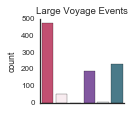

In [73]:
fig, ax = plt.subplots(figsize=(1.5, 1.5))
sns.countplot(x='isoform_domain_effects', data=voyages_large_domains, 
              palette=palette, order=isoform_domain_effects_order)
ax.set(xticks=[], xlabel='', title='Large Voyage Events')
sns.despine()

#### Show as a percentage of all events

In [79]:
ipsc_mn_voyages = voyages
print(ipsc_mn_voyages.shape)
ipsc_mn_voyages.head()

(4946, 10)


,event_id,$\Delta x$,$\Delta y$,magnitude,group1,group2,direction,transition,group1_modality,group2_modality
1,exon:chr10:101165513-101165617:-@exon:chr10:10...,0.000000,0.034483,0.034483,iPSC,MN,$\nwarrow$,iPSC-MN,included,included
4,exon:chr10:101480744-101480825:-@exon:chr10:10...,0.058824,0.070209,0.091594,iPSC,MN,$\nearrow$,iPSC-MN,included,bimodal
11,exon:chr10:102114184-102114389:+@exon:chr10:10...,0.000000,0.035088,0.035088,iPSC,MN,$\nwarrow$,iPSC-MN,included,included
14,exon:chr10:102286732-102286831:-@exon:chr10:10...,0.000000,0.000000,0.000000,iPSC,MN,NaN,iPSC-MN,included,included
17,exon:chr10:102747070-102747240:-@exon:chr10:10...,0.126068,-0.126068,0.178288,iPSC,MN,$\searrow$,iPSC-MN,included,bimodal


In [80]:
len(ipsc_mn_voyages['event_id'].unique())

4946

In [88]:
ipsc_mn_voyages = ipsc_mn_voyages.join(isoform_domain_effects, on='event_id')
ipsc_mn_voyages.head()

,event_id,$\Delta x$,$\Delta y$,magnitude,group1,group2,direction,transition,group1_modality,group2_modality,isoform_domain_effects
1,exon:chr10:101165513-101165617:-@exon:chr10:10...,0.000000,0.034483,0.034483,iPSC,MN,$\nwarrow$,iPSC-MN,included,included,No annotated reading frame --> Protein +/- domain
4,exon:chr10:101480744-101480825:-@exon:chr10:10...,0.058824,0.070209,0.091594,iPSC,MN,$\nearrow$,iPSC-MN,included,bimodal,No annotated reading frame --> Protein +/- domain
11,exon:chr10:102114184-102114389:+@exon:chr10:10...,0.000000,0.035088,0.035088,iPSC,MN,$\nwarrow$,iPSC-MN,included,included,No annotated reading frame --> Protein +/- domain
14,exon:chr10:102286732-102286831:-@exon:chr10:10...,0.000000,0.000000,0.000000,iPSC,MN,NaN,iPSC-MN,included,included,No annotated reading frame --> Protein +/- domain
17,exon:chr10:102747070-102747240:-@exon:chr10:10...,0.126068,-0.126068,0.178288,iPSC,MN,$\searrow$,iPSC-MN,included,bimodal,No annotated reading frame --> Protein +/- domain


In [99]:
ipsc_mn_voyages_domain_effects_sizes = ipsc_mn_voyages.groupby('isoform_domain_effects').size()
ipsc_mn_voyages_domain_effects_sizes.name = 'Background'

In [103]:
voyages_large_domains_size = voyages_large_domains.groupby('isoform_domain_effects').size().reset_index()
voyages_large_domains_size = voyages_large_domains_size.rename(columns={0: 'Number of events with large voyages'})
voyages_large_domains_size = voyages_large_domains_size.join(ipsc_mn_voyages_domain_effects_sizes, on='isoform_domain_effects')
voyages_large_domains_size['Percentage'] = 100*voyages_large_domains_size['Number of events with large voyages']/voyages_large_domains_size["Background"]
voyages_large_domains_size

,isoform_domain_effects,Number of events with large voyages,Background,Percentage
0,Domain --> No domain,7,20,35.000000
1,Domain switch,1,7,14.285714
2,No annotated reading frame --> Protein +/- domain,479,2282,20.990359
3,No domain --> Domain,54,140,38.571429
4,Protein +/- domain --> No annotated reading frame,229,826,27.723971
5,Same status,189,409,46.210269


In [106]:
figure_folder = 'figures/5.06_large_voyages_domain_changes'
! mkdir -p $figure_folder

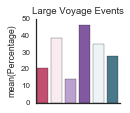

In [107]:
fig, ax = plt.subplots(figsize=(1.5, 1.5))
sns.barplot(x='isoform_domain_effects', y='Percentage', data=voyages_large_domains_size, 
              palette=palette, order=isoform_domain_effects_order)
ax.set(xticks=[], xlabel='', title='Large Voyage Events')
sns.despine()
fig.savefig('{}/domain_effects_in_large_voyages_as_percentage_of_background.pdf'.format(figure_folder))

#### Statistical enrichment



In [89]:
from scipy.stats import hypergeom

lines = []


col = 'isoform_domain_effects'

data = voyages_large_domains
data_domains_sizes = ipsc_mn_voyages.groupby(col).size()


for domain, domain_df in data.groupby(col):
    # Size of entire dataset
    M = ipsc_mn_voyages.shape[0]
    
    # Number of switching domains in entire dataset
    N = data_domains_sizes[domain]
    
    # Number of switching domains with large voyages
    x = domain_df.shape[0]
    
    # Number of events with large voyages
    n = data.shape[0]
    
    print(x, M, n, N)

    result = hypergeom.logsf(x, M, n, N)/np.log(10)
    lines.append([domain, -result])
domain_p_value_df = pd.DataFrame(lines, columns=[col, '$-\log_{10}(p)$-value'])
domain_p_value_df

(7, 4946, 1405, 20)
(1, 4946, 1405, 7)
(479, 4946, 1405, 2282)
(54, 4946, 1405, 140)
(229, 4946, 1405, 826)
(189, 4946, 1405, 409)


,isoform_domain_effects,$-\log_{10}(p)$-value
0,Domain --> No domain,7.418394e-01
1,Domain switch,1.965491e-01
2,No annotated reading frame --> Protein +/- domain,-1.504351e-14
3,No domain --> Domain,2.497989e+00
4,Protein +/- domain --> No annotated reading frame,1.759794e-01
5,Same status,1.539890e+01


In [105]:
domain_p_value_df['$-\\log_{10}(p)$-value'].astype(int)

0     0
1     0
2     0
3     2
4     0
5    15
Name: $-\log_{10}(p)$-value, dtype: int64

### Changing modalities

In [69]:
voyages_change_modality_domains = voyages_change_modality.join(isoform_domain_effects, on='event_id')
print(voyages_change_modality_domains.shape)
voyages_change_modality_domains.head()

(1067, 11)


,event_id,$\Delta x$,$\Delta y$,magnitude,group1,group2,direction,transition,group1_modality,group2_modality,isoform_domain_effects
4,exon:chr10:101480744-101480825:-@exon:chr10:10...,0.058824,0.070209,0.091594,iPSC,MN,$\nearrow$,iPSC-MN,included,bimodal,No annotated reading frame --> Protein +/- domain
17,exon:chr10:102747070-102747240:-@exon:chr10:10...,0.126068,-0.126068,0.178288,iPSC,MN,$\searrow$,iPSC-MN,included,bimodal,No annotated reading frame --> Protein +/- domain
23,exon:chr10:103360960-103361093:+@exon:chr10:10...,-0.022973,0.050000,0.055025,iPSC,MN,$\nwarrow$,iPSC-MN,excluded,bimodal,Protein +/- domain --> No annotated reading frame
29,exon:chr10:103360960-103361093:+@exon:chr10:10...,0.055556,-0.055556,0.078567,iPSC,MN,$\searrow$,iPSC-MN,included,bimodal,Protein +/- domain --> No annotated reading frame
35,exon:chr10:103563492-103563776:-@exon:chr10:10...,0.045455,-0.045455,0.064282,iPSC,MN,$\searrow$,iPSC-MN,included,bimodal,Same status


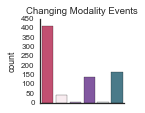

In [74]:
fig, ax = plt.subplots(figsize=(1.5, 1.5))
sns.countplot(x='isoform_domain_effects', data=voyages_change_modality_domains, 
              palette=palette, order=isoform_domain_effects_order)
ax.set(xticks=[], xlabel='', title='Changing Modality Events')
sns.despine()

In [75]:
domain_total_sizes = isoform_domain_effects.groupby(isoform_domain_effects).size().reset_index()
domain_total_sizes = domain_total_sizes.rename(columns={0: 'count'})
domain_total_sizes.head()

,isoform_domain_effects,count
0,Domain --> No domain,125
1,Domain switch,40
2,No annotated reading frame --> Protein +/- domain,14132
3,No domain --> Domain,654
4,Protein +/- domain --> No annotated reading frame,4203


## Plot PCA of large voyages

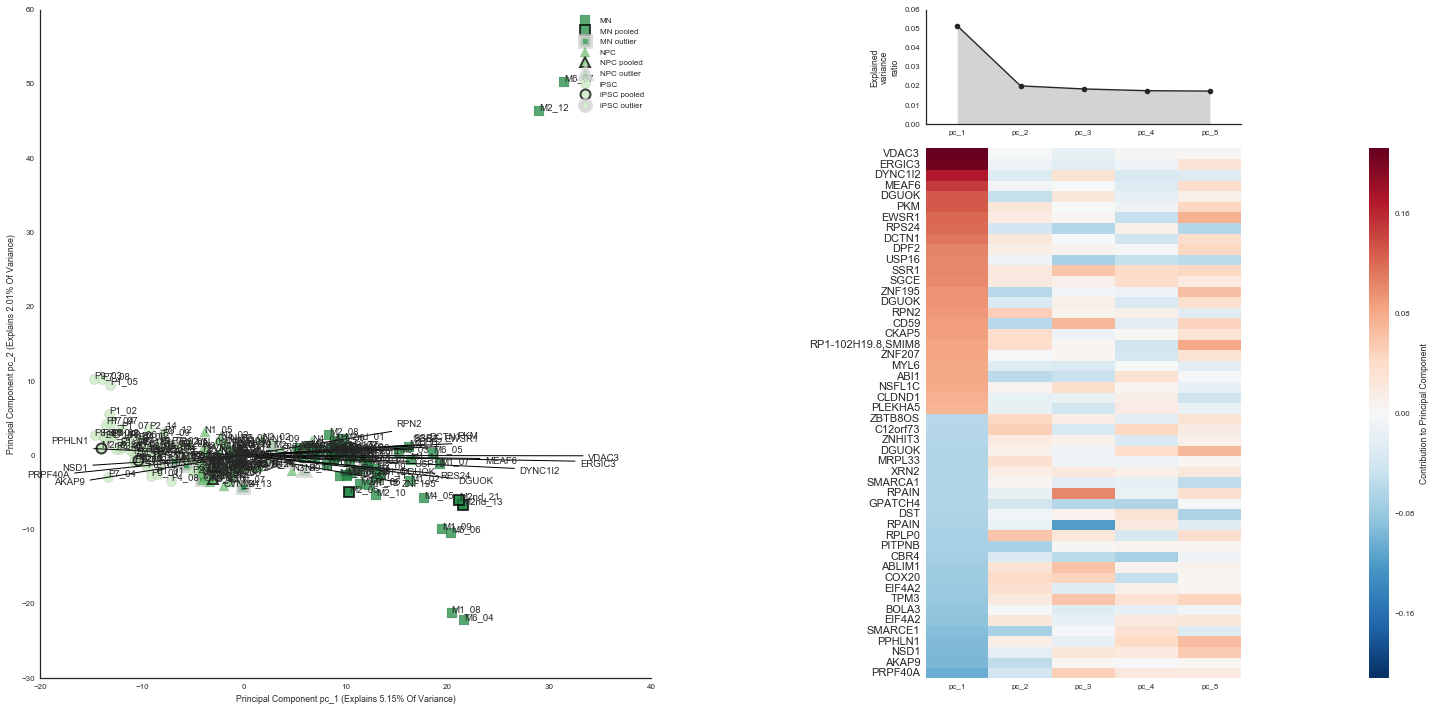

In [114]:
study.plot_pca(data_type='splicing', feature_subset=voyages_large['event_id'], show_point_labels=True)
fig = plt.gcf()
fig.savefig('{}/pca_splicing_large_voyages_ipsc_mn.pdf'.format(figure_folder))

## PCA of bimodal events

In [112]:
bimodal = study.supplemental.modalities_tidy.query('modality == "bimodal"')
print(bimodal.shape)
bimodal.head()

(7079, 3)


,phenotype,event_id,modality
1,MN,exon:chr10:101480744-101480825:-@exon:chr10:10...,bimodal
4,MN,exon:chr10:102747070-102747240:-@exon:chr10:10...,bimodal
6,MN,exon:chr10:103113864-103113985:+@exon:chr10:10...,bimodal
10,MN,exon:chr10:103360960-103361093:+@exon:chr10:10...,bimodal
12,MN,exon:chr10:103360960-103361093:+@exon:chr10:10...,bimodal


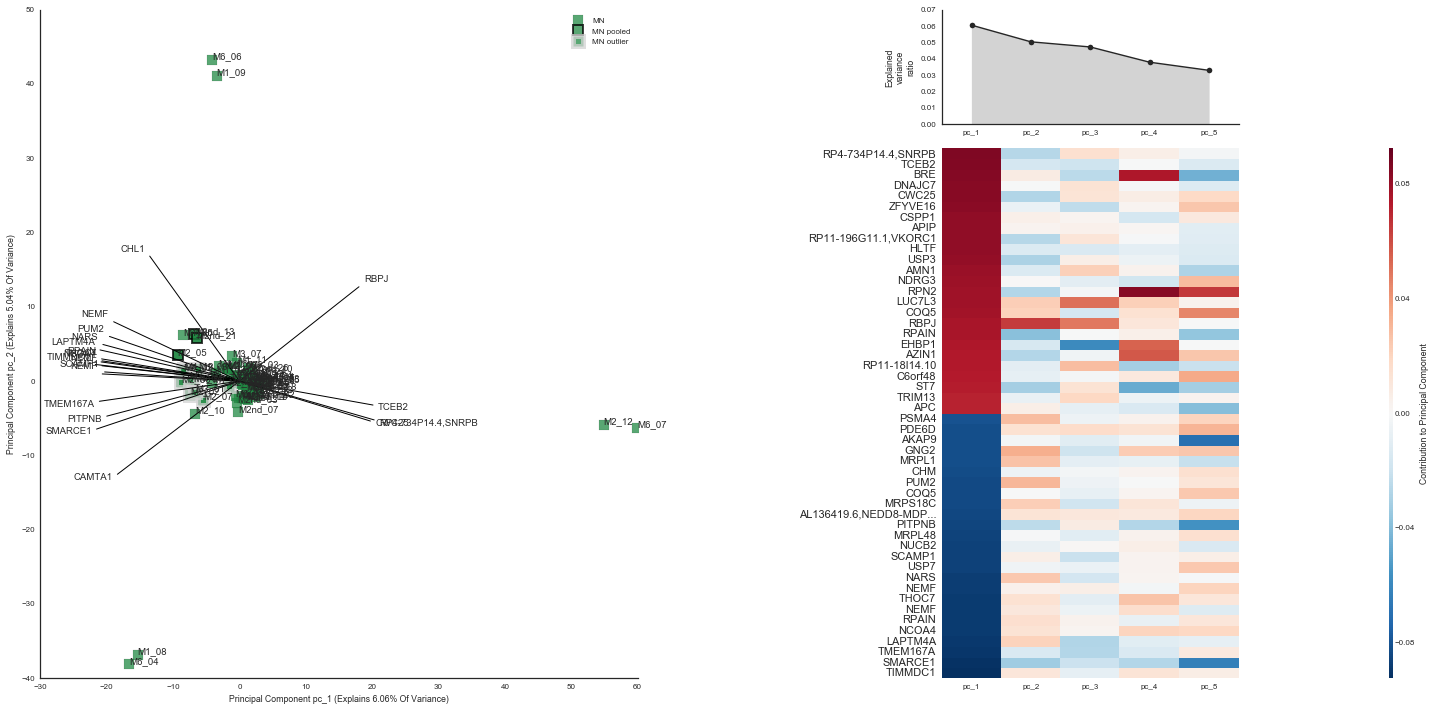

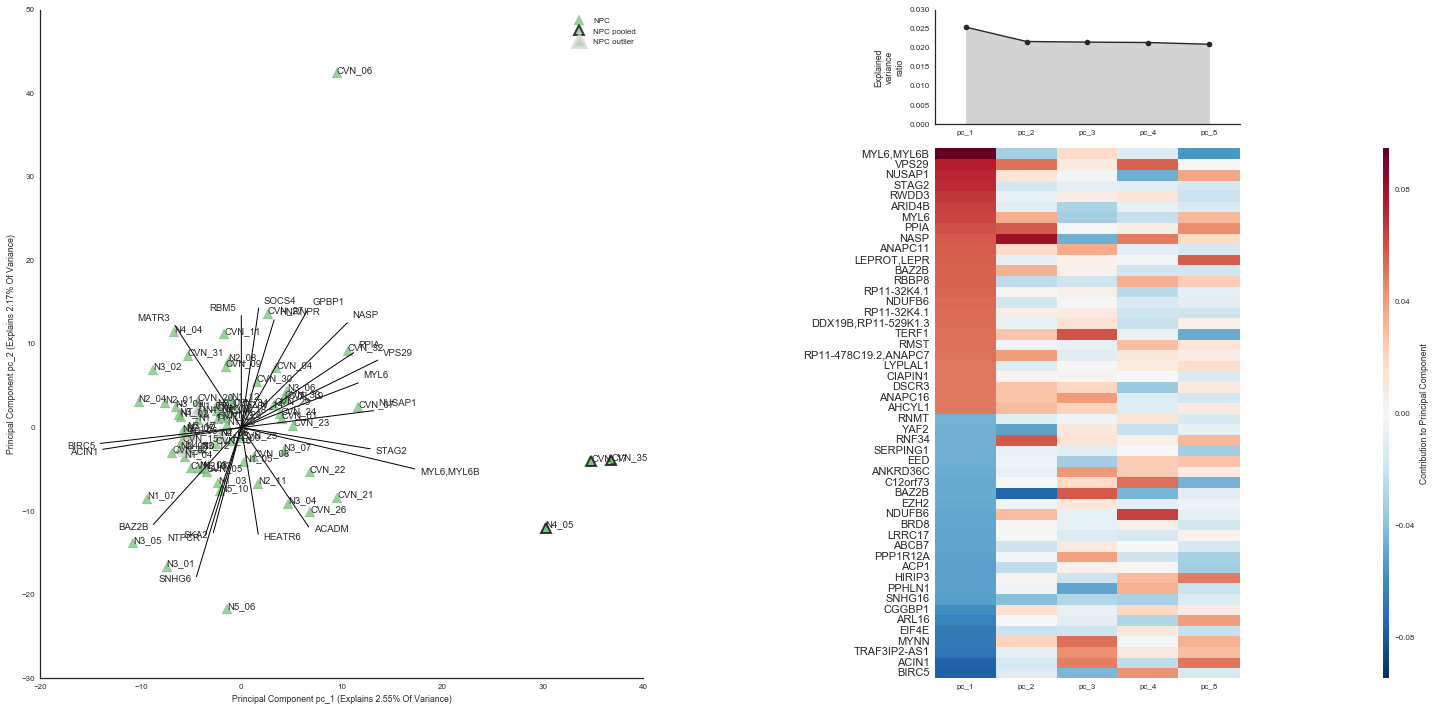

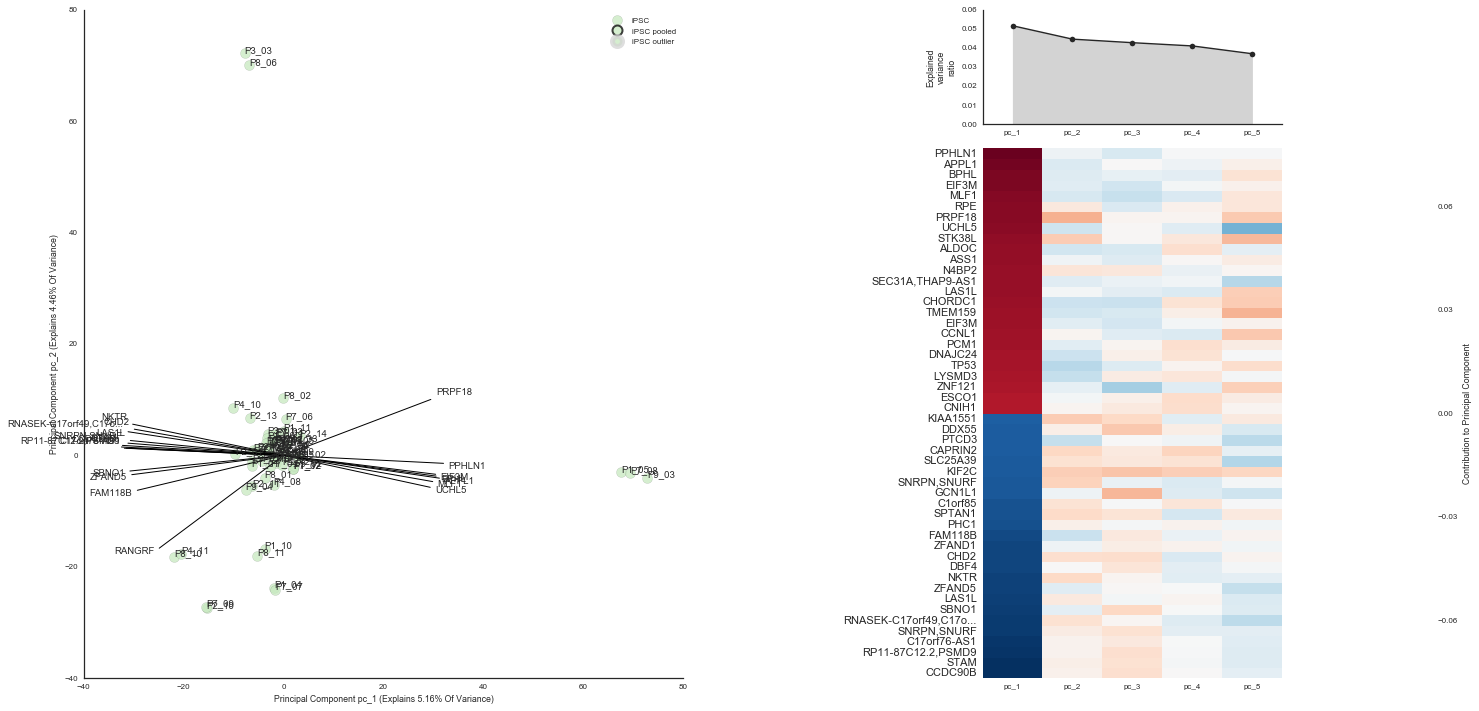

In [115]:
for phenotype, df in bimodal.groupby('phenotype'):
    pcaviz = study.plot_pca(data_type='splicing', feature_subset=df['event_id'], 
                            sample_subset=phenotype, show_point_labels=True)
    fig = plt.gcf()
    fig.savefig('{}/pca_bimodal_events_{}_labeled.pdf'.format(figure_folder, phenotype))

In [ ]:
range(2)

In [ ]:

for phenotype, df in bimodal.groupby('phenotype'):
    if phenotype != 'MN':
        continue
    pcaviz = study.plot_pca(data_type='splicing', feature_subset=df['event_id'], 
                            sample_subset=phenotype, show_point_labels=True)


In [ ]:
pcaviz.

### Do clustermaps too

In [ ]:
multiplier = 2

for phenotype, df in bimodal.groupby('phenotype'):
    pcaviz = study.plot_pca(data_type='splicing', feature_subset=df['event_id'], 
                            sample_subset=phenotype, show_point_labels=True)
    fig = plt.gcf()
    fig.savefig('{}/pca_bimodal_events_{}_labeled.pdf'.format(figure_folder, phenotype))
    
    components = pcaviz.components_.T
    mean = components.mean()
    std = components.std()
    
    variant_components = components[(components > (mean + multipler*std)) | (components < (mean - multipler*std))]
    for i, (pc_name, pc) in enumerate(variant_components.iteritems()):
        if i > 5:
            break
        samples = study.sample_subset_to_sample_ids(phenotype)
        
        data = study.splicing.data.loc[samples, df['event_id']]
        data = data.dropna(thresh=10)
        mask = data.isnull()
#         xticklabels = study.splicing.feature_data.loc[data.]
        
        plot_data = data.fillna(data.mean()).T
        print(plot_data.shape)
        
        g = sns.clustermap(plot_data, mask=mask, method='ward', cmap='RdYlBu_r', yticklabels=[])
        g.fig.suptitle('{phenotype} {pc}'.format(phenotype=phenotype, pc=pc_name))
        g.savefig('{folder}/pca_bimodal_events_{phenotype}_{pc}.pdf'.format(
                folder=figure_folder, phenotype=phenotype, pc=pc_name))

In [119]:
components = pcaviz.components_.T
components.head()

,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,pc_10,...,pc_52,pc_53,pc_54,pc_55,pc_56,pc_57,pc_58,pc_59,pc_60,pc_61
exon:chr1:21220010-21220129:-@exon:chr1:21219112-21219222:-@exon:chr1:21212694-21212864:-,0.002234,0.001274,-0.015433,0.000657,-0.024960,-0.010538,0.005585,0.030146,0.038482,-0.010710,...,-0.004126,-0.001811,0.002289,-0.001890,-0.000531,0.000018,-0.000486,0.006059,-0.000749,0.027396
exon:chr11:62496295-62496558:+@exon:chr11:62500590-62500671:+@exon:chr11:62502854-62503691:+,0.006339,-0.002224,0.011410,-0.005571,-0.008229,-0.005607,-0.017225,-0.013717,-0.015000,0.007087,...,0.015359,0.003782,0.007592,-0.000307,-0.002092,0.004106,0.000238,0.001885,-0.002861,0.049482
exon:chr12:62777621-62777779:+@exon:chr12:62777859-62778083:+@exon:chr12:62783211-62783294:+,0.012696,0.006454,0.005930,-0.000259,0.010332,-0.003111,0.003131,0.003463,-0.004023,0.027408,...,0.003730,-0.001934,-0.001981,0.001724,0.001440,0.001147,-0.000712,-0.002662,-0.000167,-0.059682
exon:chr1:147400549-147400691:+@exon:chr1:147408741-147408800:+@exon:chr1:147410828-147410931:+,-0.005781,-0.017955,-0.000008,0.010035,-0.011489,0.003734,0.010906,-0.004564,0.011470,0.004972,...,-0.000220,0.005242,0.002468,0.003030,-0.003717,0.003436,0.006483,-0.000294,-0.001109,0.017115
exon:chr6:86387854-86388238:-@exon:chr6:86387672-86387750:-@exon:chr6:86387187-86387210:-,0.011182,-0.010521,0.001100,0.012944,0.010129,-0.002506,0.010567,-0.036250,-0.035307,-0.010652,...,0.006033,-0.005458,-0.004307,0.003626,-0.040275,-0.008047,0.011673,-0.001999,-0.007916,-0.011747


In [121]:
mean = components.mean()
mean.head()

pc_1   -0.000087
pc_2    0.000084
pc_3   -0.000356
pc_4   -0.000801
pc_5    0.000603
dtype: float64

In [123]:
std = components.std()
std.head()

pc_1    0.017057
pc_2    0.017057
pc_3    0.017054
pc_4    0.017038
pc_5    0.017047
dtype: float64

In [125]:
multipler = 2

variant_components = components[(components > (mean + multipler*std)) | (components < (mean - multipler*std))]
variant_components.head()

,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,pc_10,...,pc_52,pc_53,pc_54,pc_55,pc_56,pc_57,pc_58,pc_59,pc_60,pc_61
exon:chr1:21220010-21220129:-@exon:chr1:21219112-21219222:-@exon:chr1:21212694-21212864:-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.038482,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exon:chr11:62496295-62496558:+@exon:chr11:62500590-62500671:+@exon:chr11:62502854-62503691:+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.049482
exon:chr12:62777621-62777779:+@exon:chr12:62777859-62778083:+@exon:chr12:62783211-62783294:+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.059682
exon:chr1:147400549-147400691:+@exon:chr1:147408741-147408800:+@exon:chr1:147410828-147410931:+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exon:chr6:86387854-86388238:-@exon:chr6:86387672-86387750:-@exon:chr6:86387187-86387210:-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.03625,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.040275,NaN,NaN,NaN,NaN,NaN


In [126]:
variant_components.notnull().sum()

pc_1     236
pc_2     254
pc_3     266
pc_4     247
pc_5     250
pc_6     269
pc_7     208
pc_8     229
pc_9     262
pc_10    222
pc_11    186
pc_12    189
pc_13    243
pc_14    229
pc_15    180
pc_16    230
pc_17    180
pc_18    170
pc_19    178
pc_20    221
pc_21    201
pc_22    182
pc_23    227
pc_24    197
pc_25    184
pc_26    203
pc_27    195
pc_28    168
pc_29    214
pc_30    224
        ... 
pc_32    204
pc_33    212
pc_34    199
pc_35    209
pc_36    200
pc_37    194
pc_38    209
pc_39    195
pc_40    208
pc_41    221
pc_42    250
pc_43    233
pc_44    246
pc_45    220
pc_46    216
pc_47    227
pc_48    188
pc_49    193
pc_50    192
pc_51    170
pc_52    194
pc_53    160
pc_54    206
pc_55    183
pc_56    141
pc_57    169
pc_58    172
pc_59    133
pc_60    151
pc_61    209
dtype: int64